# Week 4

## Comparing device mix and activity categories across demographics and creating visuals

In [ ]:
# Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Updated_Indian_Kids_ScreenTime.csv')
sns.set_style('whitegrid')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Category,Device_Category,Screen_Size,Concern_Level
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical Impact,Portable,"<30""",Attention Needed
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teen,Physical Impact,Portable,"<30""",Attention Needed
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late-teens,Physical Impact,Wall-mounted,">=30""",Attention Needed
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers,No Health Impact,Portable,"<30""",No Harm
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teen,"Physical, Mental Impact",Portable,"<30""",Attention Needed


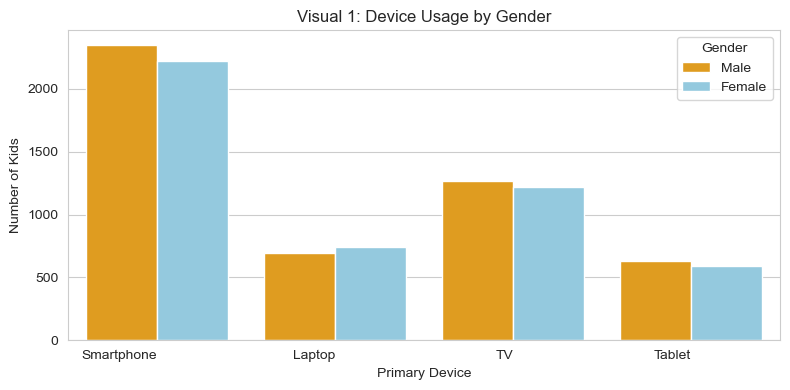

In [ ]:
# Visual 1: Device Usage by Gender
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Primary_Device', hue='Gender', palette={"Male": 'Orange', "Female": "Skyblue"})
plt.title('Visual 1: Device Usage by Gender')
plt.xlabel('Primary Device')
plt.ylabel('Number of Kids')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

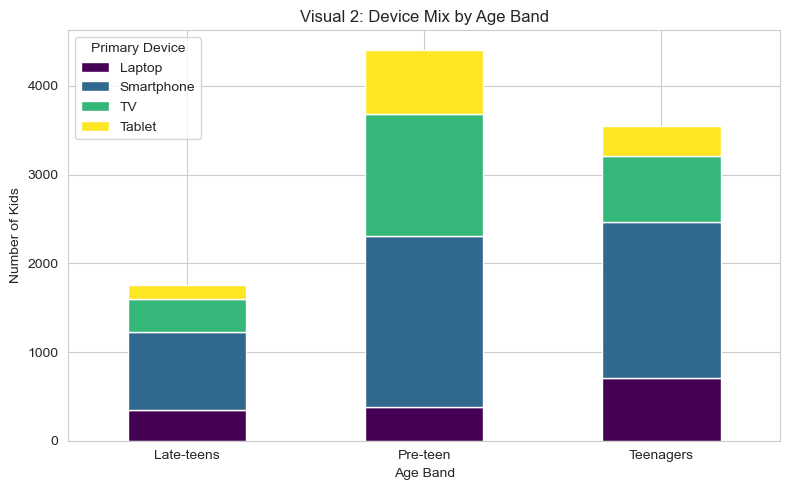

In [ ]:
# Visual 2: Device Mix by Age Band ( Stacked bar chart)

age_device_crosstab = pd.crosstab(df['Age_Band'], df['Primary_Device'])      # Created a cross-tabulation to count devices per age band

age_device_crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Visual 2: Device Mix by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Kids')
plt.xticks(rotation=0)
plt.legend(title='Primary Device')
plt.tight_layout()
plt.show()

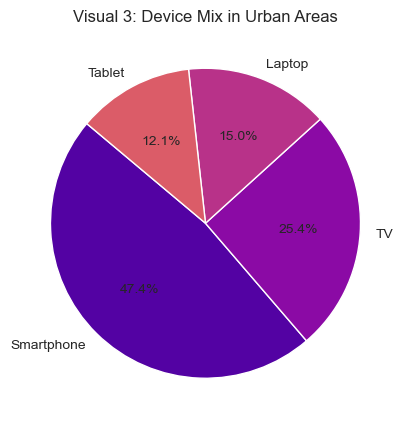

In [ ]:
# Visual 3: Device Mix in Urban Areas
df_urban = df[df['Urban_or_Rural'] == 'Urban']
urban_device_counts = df_urban['Primary_Device'].value_counts()

plt.figure(figsize=(5, 7))
plt.pie(urban_device_counts, labels=urban_device_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('plasma'))
plt.title('Visual 3: Device Mix in Urban Areas')
plt.ylabel('') 
plt.show()

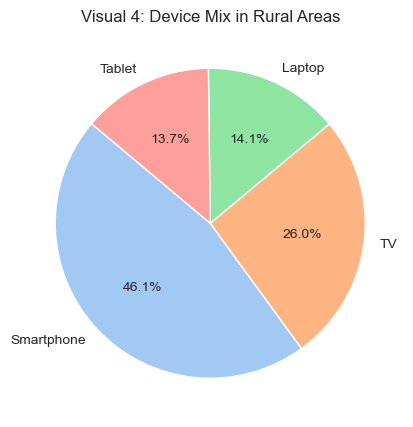

In [ ]:
# Visual 4: Device Mix in Rural Areas
df_rural = df[df['Urban_or_Rural'] == 'Rural']
rural_device_counts = df_rural['Primary_Device'].value_counts()

plt.figure(figsize=(5, 7))
plt.pie(rural_device_counts, labels=rural_device_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel'))
plt.title('Visual 4: Device Mix in Rural Areas')
plt.ylabel('')
plt.show()

In [ ]:
# Calculating the recreational ratio
if 'df' in locals():
    df['Recreational_Ratio'] = 1 - df['Educational_to_Recreational_Ratio']
    print("Added 'Recreational_Ratio' column.")

Added 'Recreational_Ratio' column.


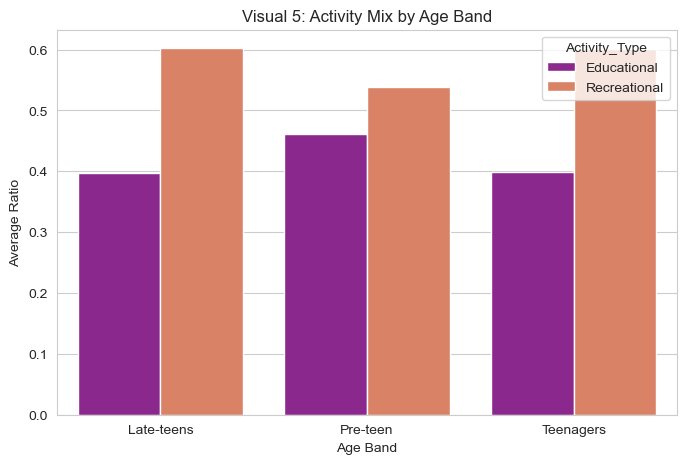

In [ ]:
# Visual 5: Activity Mix by Age Band

#  Group by 'AgeBand' and calculating the mean of the ratios
age_band_ratios = df.groupby('Age_Band')[['Educational_to_Recreational_Ratio', 'Recreational_Ratio']].mean().reset_index()

age_band_ratios_melted = age_band_ratios.melt(id_vars='Age_Band',
                                              var_name='Activity_Type',
                                              value_name='Average_Ratio')
age_band_ratios_melted['Activity_Type'] = age_band_ratios_melted['Activity_Type'].replace({
    'Educational_to_Recreational_Ratio': 'Educational',
    'Recreational_Ratio': 'Recreational'
})

plt.figure(figsize=(8, 5))
sns.barplot(data=age_band_ratios_melted, x='Age_Band', y='Average_Ratio', hue='Activity_Type', palette='plasma')
plt.title('Visual 5: Activity Mix by Age Band')
plt.xlabel('Age Band')
plt.ylabel('Average Ratio')
plt.xticks(rotation=0)
plt.show()

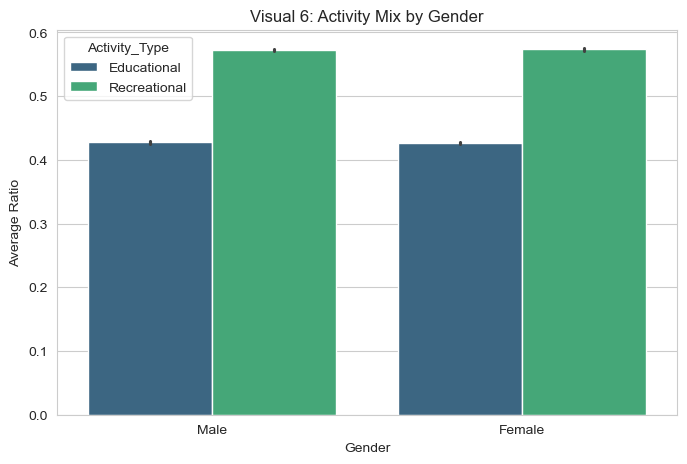

In [ ]:
# Visual 6: Activity Mix by Gender

activity_df_gender = df.melt(id_vars=['Gender'], value_vars=['Educational_to_Recreational_Ratio', 'Recreational_Ratio'],
                             var_name='Activity_Type', value_name='Ratio')
activity_df_gender['Activity_Type'] = activity_df_gender['Activity_Type'].replace({
    'Educational_to_Recreational_Ratio': 'Educational',
    'Recreational_Ratio': 'Recreational'
})

plt.figure(figsize=(8, 5))
sns.barplot(data=activity_df_gender, x='Gender', y='Ratio', hue='Activity_Type', palette='viridis')
plt.title('Visual 6: Activity Mix by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Ratio')
plt.show()

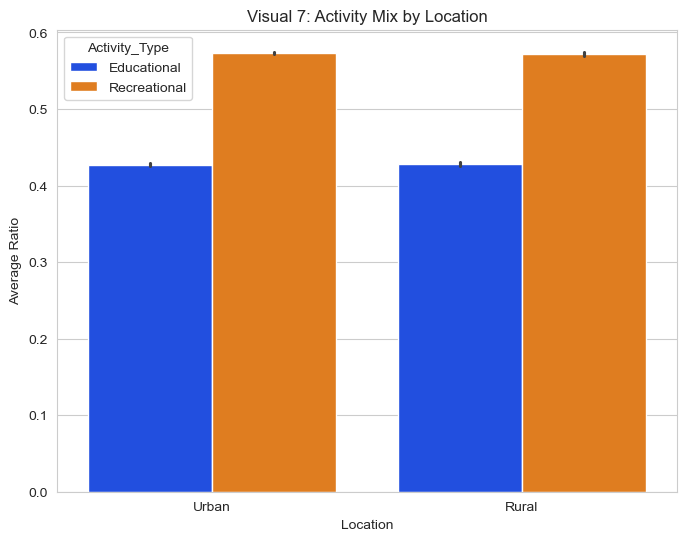

In [ ]:
# Visual 7 (Corrected for Legend Colors): Activity Mix by Location

activity_df_location = df.melt(id_vars=['Urban_or_Rural'],
                               value_vars=['Educational_to_Recreational_Ratio', 'Recreational_Ratio'],
                               var_name='Activity_Type', value_name='Ratio')

activity_df_location['Activity_Type'] = activity_df_location['Activity_Type'].replace({
    'Educational_to_Recreational_Ratio': 'Educational',
    'Recreational_Ratio': 'Recreational'
})

plt.figure(figsize=(8, 6))
sns.barplot(data=activity_df_location, x='Urban_or_Rural', y='Ratio', hue='Activity_Type', palette='bright')
plt.title('Visual 7: Activity Mix by Location')
plt.xlabel('Location')
plt.ylabel('Average Ratio')
plt.show()

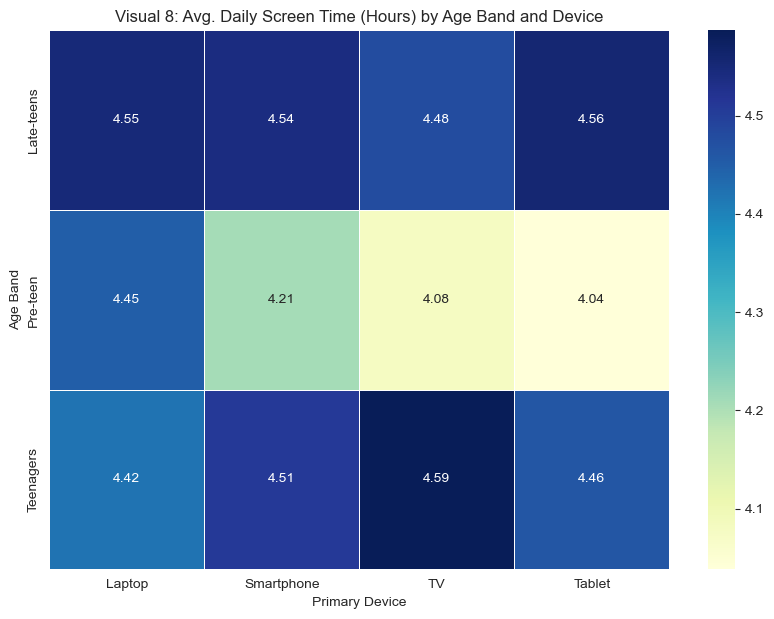

In [ ]:
# Visual 8: Peak Usage Heatmap
# Create a pivot table for the heatmap data
heatmap_data = df.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Age_Band', columns='Primary_Device', aggfunc='mean')

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Visual 8: Avg. Daily Screen Time (Hours) by Age Band and Device')
plt.xlabel('Primary Device')
plt.ylabel('Age Band')
plt.show()

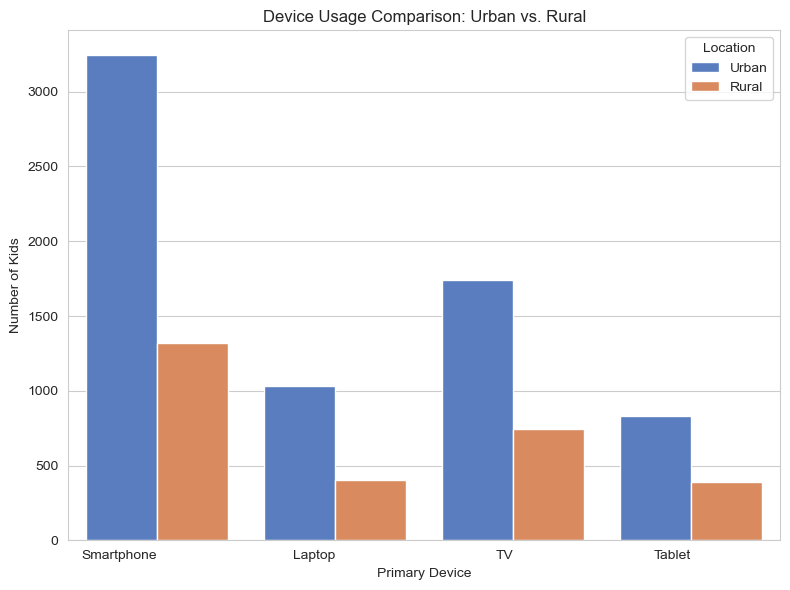

In [ ]:
# Visual9: Device Usage by Location

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Primary_Device', hue='Urban_or_Rural', palette='muted')

# Add titles and labels for clarity
plt.title('Device Usage Comparison: Urban vs. Rural')
plt.xlabel('Primary Device')
plt.ylabel('Number of Kids')
plt.xticks(rotation=0, ha='right')
plt.legend(title='Location')

plt.tight_layout()
plt.show()

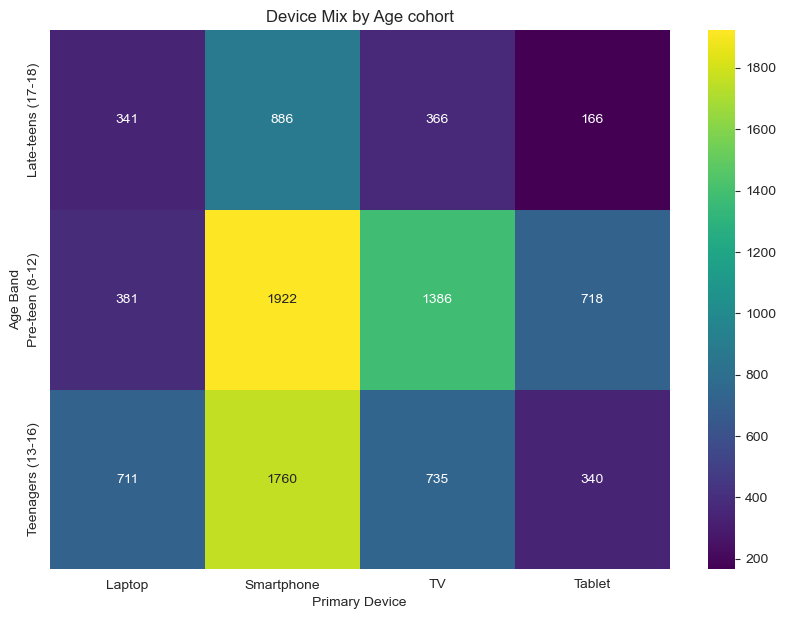

In [ ]:
# visual 10: Heatmap for Device Mix by Age

device_age_counts = pd.crosstab(df['Age_Band'], df['Primary_Device'])

new_labels = {
    'Pre-teen': 'Pre-teen (8-12)',
    'Teenagers': 'Teenagers (13-16)',
    'Late-teens': 'Late-teens (17-18)'
}
device_age_counts = device_age_counts.rename(index=new_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(device_age_counts,annot=True,fmt='d', cmap="viridis")
plt.title('Device Mix by Age cohort')
plt.xlabel('Primary Device')
plt.ylabel('Age Band')
plt.show()

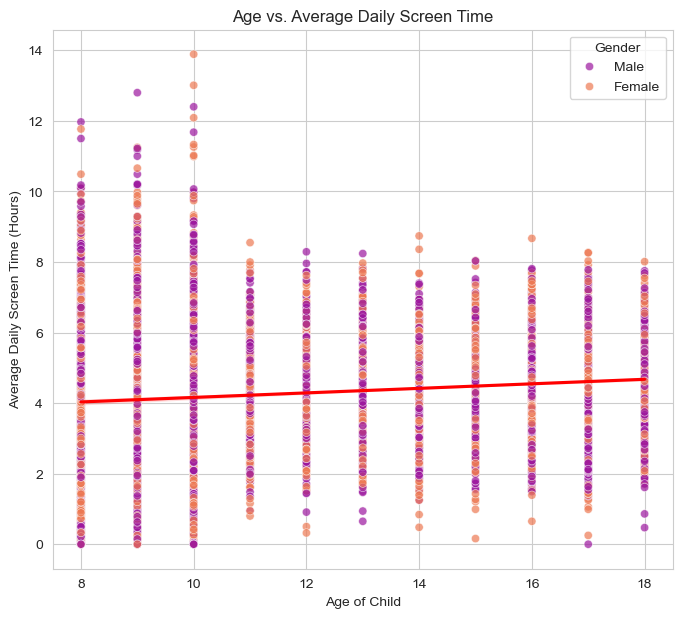

In [ ]:
#  visual 11: Create the scatter plot

plt.figure(figsize=(8, 7))
sns.scatterplot(data=df,  x='Age',  y='Avg_Daily_Screen_Time_hr',  hue='Gender',  palette='plasma', alpha=0.7) 

    # Added a regression line to see the trend more clearly
sns.regplot(data=df,  x='Age',  y='Avg_Daily_Screen_Time_hr', scatter=False, color='red')   

plt.title('Age vs. Average Daily Screen Time')
plt.xlabel('Age of Child')
plt.ylabel('Average Daily Screen Time (Hours)')
plt.grid(True)
plt.show()


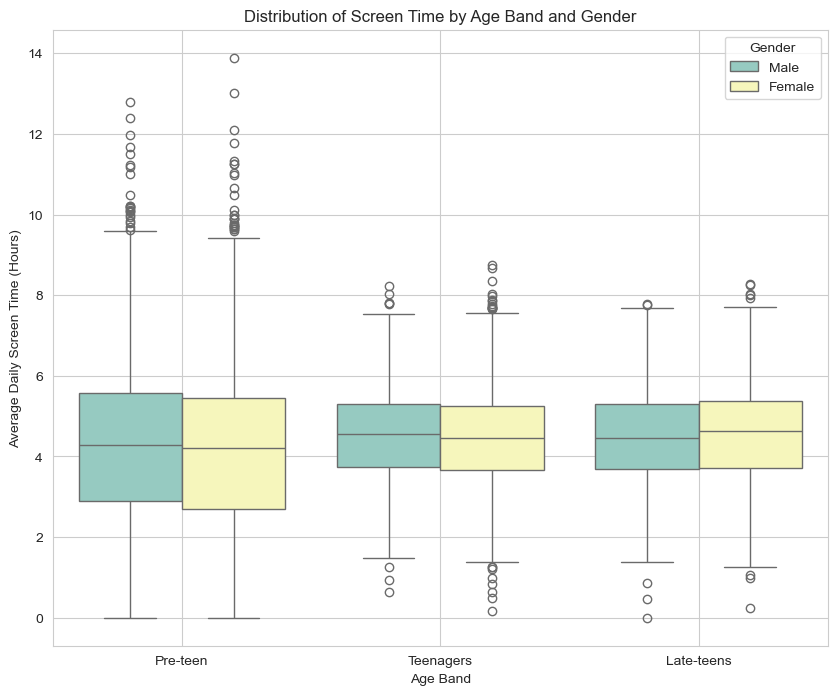

In [ ]:
# Visual 12: Box plot for Age band, Screen time, Gender

plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', palette='Set3',order=['Pre-teen', 'Teenagers', 'Late-teens'])

plt.title('Distribution of Screen Time by Age Band and Gender')
plt.xlabel('Age Band')
plt.ylabel('Average Daily Screen Time (Hours)')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

## OBSERVATIONS FROM VISUALS

1. Teenagers and late-teens show the highest average daily screen time. Both male and female students cross the recommended limits, 
   with females slightly higher in younger age bands.
2. Smartphones dominate as the most used device, followed by laptops whereas TV and tablets are much less common as primary devices.
3. Poor sleep is the most common health issue, followed by eye strain, Anxiety and obesity are less frequent but still notable.
4. Majority of pre-teens and teenagers exceed recommended screen time there are Very few in the youngest age band stay within healthy limits.
5. Recreational use heavily outweighs educational use across all groups, Very few have a balanced or education-focused usage.
6. More participants are from urban areas than rural and Urban students show relatively higher screen exposure.
7. Most students fall under "Attention Needed", Very few are in the "No Harm" zone, especially among teens.
8. There is a clear positive trend showing that as children get older, their average daily screen time tends to increase, The upward slope of the
   red regression line confirms this relationship, suggesting a consistent rise in screen usage from pre-teen years to late teens.
9. Screen time is nearly identical for pre-teen boys and girls, a gap appears and grows with age.
10. Late-teens group, males have a noticeably higher median screen time and a wider range of usage compared to females, suggesting that screen time         habits diverge significantly between genders as they get older.
                                                                                                                 